**Just planning to add the explorations that I am going to do for this competition. Happy Kaggling.!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

color = sns.color_palette()

**Dataset Size:**

First let us check the number of rows in train and test file

In [2]:
data_path = "../input/"
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['ncodpers'])
test = pd.read_csv(data_path+"test_ver2.csv", usecols=['ncodpers'])
print("Number of rows in train : ", train.shape[0])
print("Number of rows in test : ", test.shape[0])

Number of rows in train :  13647309
Number of rows in test :  929615


**No of Customers:**

Now let us look at the number of unique customers in train data and test data and also the number of customers common between both

In [3]:
train_unique_customers = set(train.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_customers))
print("Number of customers in test : ", len(test_unique_customers))
print("Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers)))

Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


**Missing Customers in Sample Submission:**

From this [post][1], it is claimed that there are some missing customers between test and sample submission. So let us explore that.!

Edit : This has been fixed now in the second version of the dataset. Now we can see that both test and sub file have same number of unique customers.!


  [1]: https://www.kaggle.com/c/santander-product-recommendation/forums/t/24801/missing-ids/141477#post141477

In [4]:
sub = pd.read_csv(data_path+"sample_submission.csv")
print("Number of rows in sample submission file : ",sub.shape[0])
sub_unique_customers = set(sub.ncodpers.unique())
print("Number of unique customers in sample submission file : ",len(sub_unique_customers))
print("Number of customers from test missing in sample sub :", len(test_unique_customers - sub_unique_customers))

Number of rows in sample submission file :  929615
Number of unique customers in sample submission file :  929615
Number of customers from test missing in sample sub : 0


Let us see the count of occurrences of each of the customers in train set

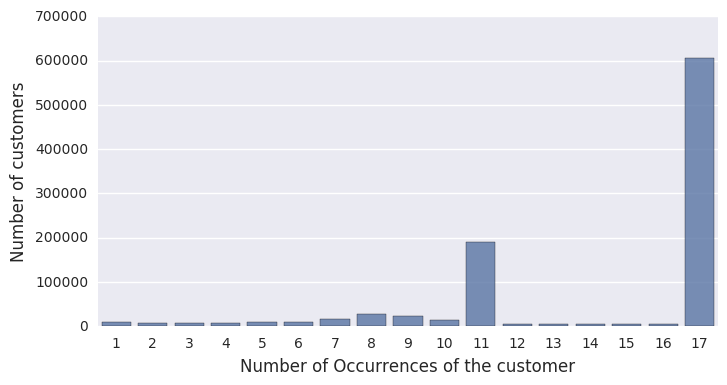

In [5]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()

We have 17 months of data present in our train and we can clearly see that majority of the customers are present for all 17 months. There is also a small spike at '11 month' compared to other months.! 

In [6]:
del train_unique_customers
del test_unique_customers
del sub
del sub_unique_customers

**Target Variables distribution:**

There are 24 target variables present in this dataset are as follows:

1. ind_ahor_fin_ult1	  - Saving Account

2. ind_aval_fin_ult1	  - Guarantees

3. ind_cco_fin_ult1	  - Current Accounts

4. ind_cder_fin_ult1	  - Derivada Account

5. ind_cno_fin_ult1	  - Payroll Account

6. ind_ctju_fin_ult1	  - Junior Account

7. ind_ctma_fin_ult1 - Más particular Account

8. ind_ctop_fin_ult1 - particular Account

9. ind_ctpp_fin_ult1 - particular Plus Account

10. ind_deco_fin_ult1 - Short-term deposits

11. ind_deme_fin_ult1 - Medium-term deposits

12. ind_dela_fin_ult1 - Long-term deposits

13. ind_ecue_fin_ult1 - e-account

14. ind_fond_fin_ult1 - Funds

15. ind_hip_fin_ult1 - Mortgage

16. ind_plan_fin_ult1 - Pensions

17. ind_pres_fin_ult1 - Loans

18. ind_reca_fin_ult1 - Taxes

19. ind_tjcr_fin_ult1 - Credit Card

20. ind_valo_fin_ult1 - Securities

21. ind_viv_fin_ult1 - Home Account

22. ind_nomina_ult1 - Payroll

23. ind_nom_pens_ult1 - Pensions

24. ind_recibo_ult1 - Direct Debit

Let us check the number of times the given product has been bought in the train dataset

In [7]:
train = pd.read_csv(data_path+"train_ver2.csv", dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

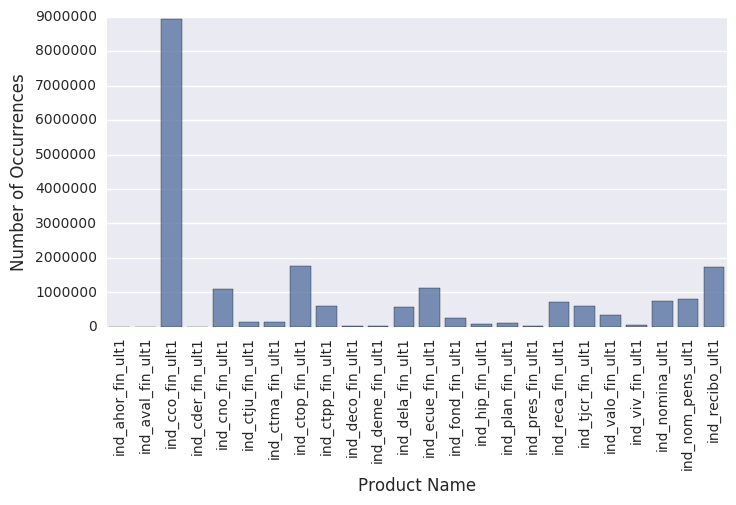

In [8]:
target_counts = train.astype('float64').sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Product "ind_cco_fin_ult1 " is the most bought one and "ind_aval_fin_ult1" is the least bought one.

**Exploring Dates:**

Let us explore the dates now and see if there are any insights. There are 2 date fields present in the data.

1. fecha_dato - The date of observation
2. fecha_alta - The date in which the customer became as the first holder of a contract in the bank

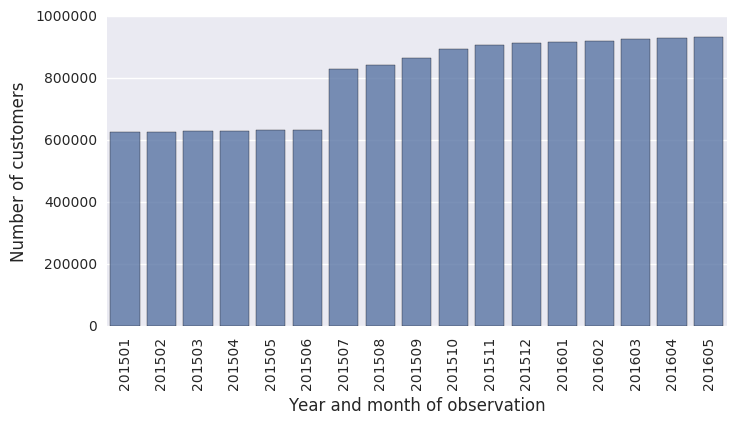

In [9]:
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['fecha_dato', 'fecha_alta'], parse_dates=['fecha_dato', 'fecha_alta'])
train['fecha_dato_yearmonth'] = train['fecha_dato'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_dato_yearmonth'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[0])
plt.xlabel('Year and month of observation', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

For the first six months of the given train data, the number of customers / observations remain almost same and then there is a sudden spike in the number of customers / observations during July 2015.

Minimum value of fetcha_alta :  199501.0
Maximum value of fetcha_alta :  201605.0


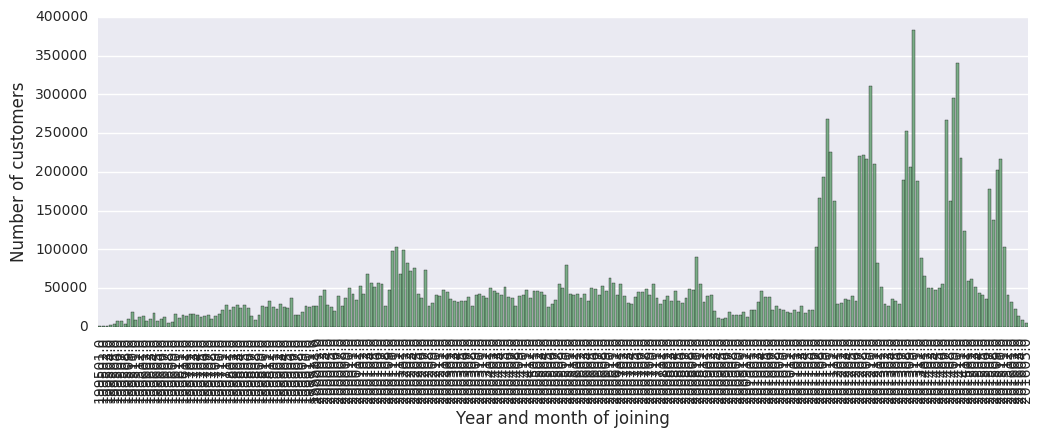

In [10]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_alta_yearmonth'].value_counts()
print("Minimum value of fetcha_alta : ", min(yearmonth.index))
print("Maximum value of fetcha_alta : ", max(yearmonth.index))

plt.figure(figsize=(12,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So the first holder date starts from January 1995. But as we can see, the number is high during the recent years.! 

Also it seems there are some seasonal peaks in the data. Let us have a close look at them.!

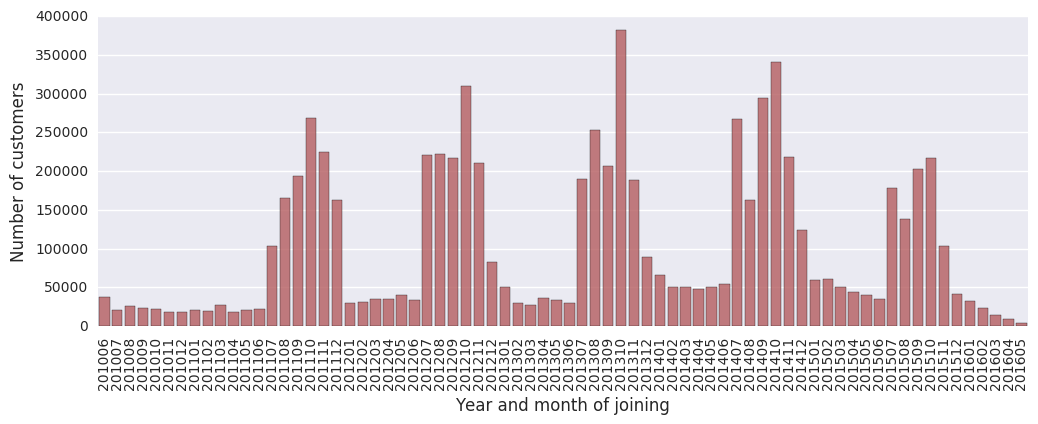

In [11]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[185:]
year_month.columns = ['yearmonth', 'number_of_customers']

plt.figure(figsize=(12,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color=color[2])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

From 2011, the number of customers becoming the first folder of a contract in **the second six months is much higher than the first six months** in a calendar year and it is across all years after that. Looks interesting to me from a business standpoint.!  